In [2]:
import pandas as pd
import numpy as np

In [3]:
# import danych i podgląd
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# wydruk nazw kolumn
for i in df.columns:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [5]:
dict_colums_names = {
                    "fixed acidity": "kwasowość_stała",
                    "volatile acidity": "kwasowość_lotna",
                    "citric acid": "kwas_cytrynowy",
                    "residual sugar": "cukier_resztkowy",
                    "chlorides": "chlorki",
                    "free sulfur dioxide": "wolny_dwutlenek_siarki",
                    "total sulfur dioxide": "całkowity_dwutlenek_siarki",
                    "density": "gęstość",
                    "pH": "pH",
                    "sulphates": "siarczany",
                    "alcohol": "alkohol",
                    "quality": "jakość",    
                    }

In [6]:
df.rename(columns=dict_colums_names, inplace=True)
df


,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
# sprawdzenie czy mamy NaN
df.isna().sum()

kwasowość_stała               0
kwasowość_lotna               0
kwas_cytrynowy                0
cukier_resztkowy              0
chlorki                       0
wolny_dwutlenek_siarki        0
całkowity_dwutlenek_siarki    0
gęstość                       0
pH                            0
siarczany                     0
alkohol                       0
jakość                        0
dtype: int64

In [10]:
# sprawdzenie czy mamy nulle
df.isnull().sum()

kwasowość_stała               0
kwasowość_lotna               0
kwas_cytrynowy                0
cukier_resztkowy              0
chlorki                       0
wolny_dwutlenek_siarki        0
całkowity_dwutlenek_siarki    0
gęstość                       0
pH                            0
siarczany                     0
alkohol                       0
jakość                        0
dtype: int64

In [11]:
# sprawdzenie typu kolumn
df.dtypes

kwasowość_stała               float64
kwasowość_lotna               float64
kwas_cytrynowy                float64
cukier_resztkowy              float64
chlorki                       float64
wolny_dwutlenek_siarki        float64
całkowity_dwutlenek_siarki    float64
gęstość                       float64
pH                            float64
siarczany                     float64
alkohol                       float64
jakość                          int64
dtype: object

In [13]:
# sprawdzenie statystyk
df.describe()

,kwasowość_stała,kwasowość_lotna,kwas_cytrynowy,cukier_resztkowy,chlorki,wolny_dwutlenek_siarki,całkowity_dwutlenek_siarki,gęstość,pH,siarczany,alkohol,jakość
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kwasowość_stała             1599 non-null   float64
 1   kwasowość_lotna             1599 non-null   float64
 2   kwas_cytrynowy              1599 non-null   float64
 3   cukier_resztkowy            1599 non-null   float64
 4   chlorki                     1599 non-null   float64
 5   wolny_dwutlenek_siarki      1599 non-null   float64
 6   całkowity_dwutlenek_siarki  1599 non-null   float64
 7   gęstość                     1599 non-null   float64
 8   pH                          1599 non-null   float64
 9   siarczany                   1599 non-null   float64
 10  alkohol                     1599 non-null   float64
 11  jakość                      1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
# import bibliotek do wykresów
import seaborn as sns
import matplotlib.pyplot as plt

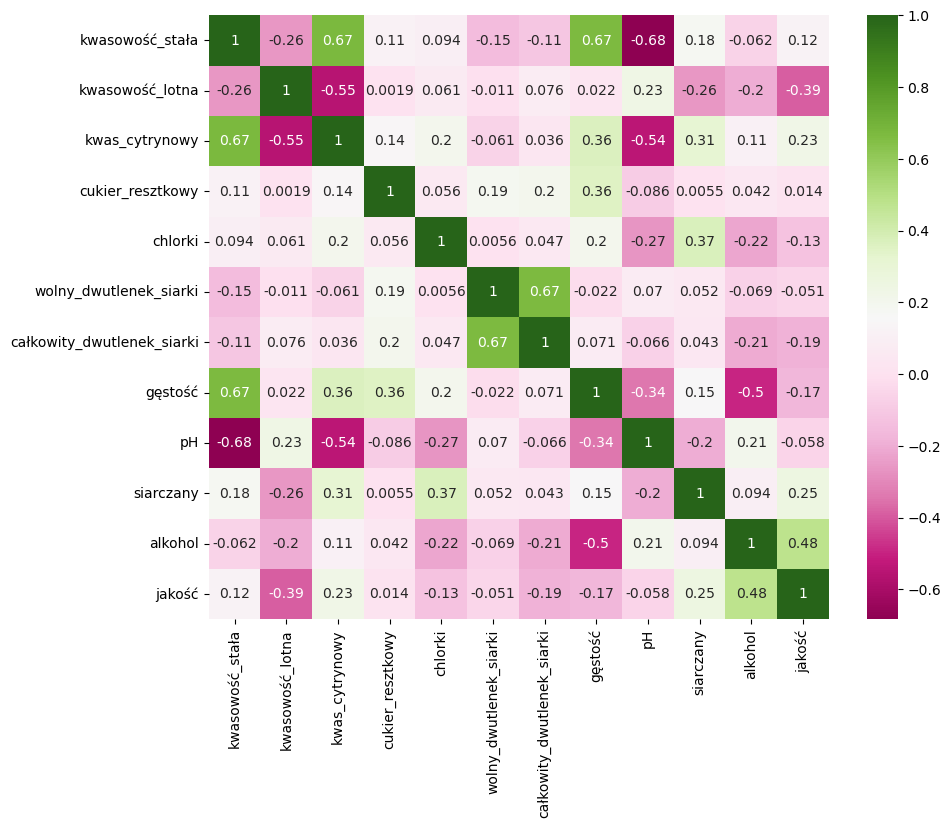

In [28]:
# sprawdzenie korelacji
figure = plt.figure(figsize = (10, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

# najwieksza pozytywna korelacje na jakosc wina ma alkohol
# najwieksza negatywna korelacje na jakosci wina ma kwasowosc lotna

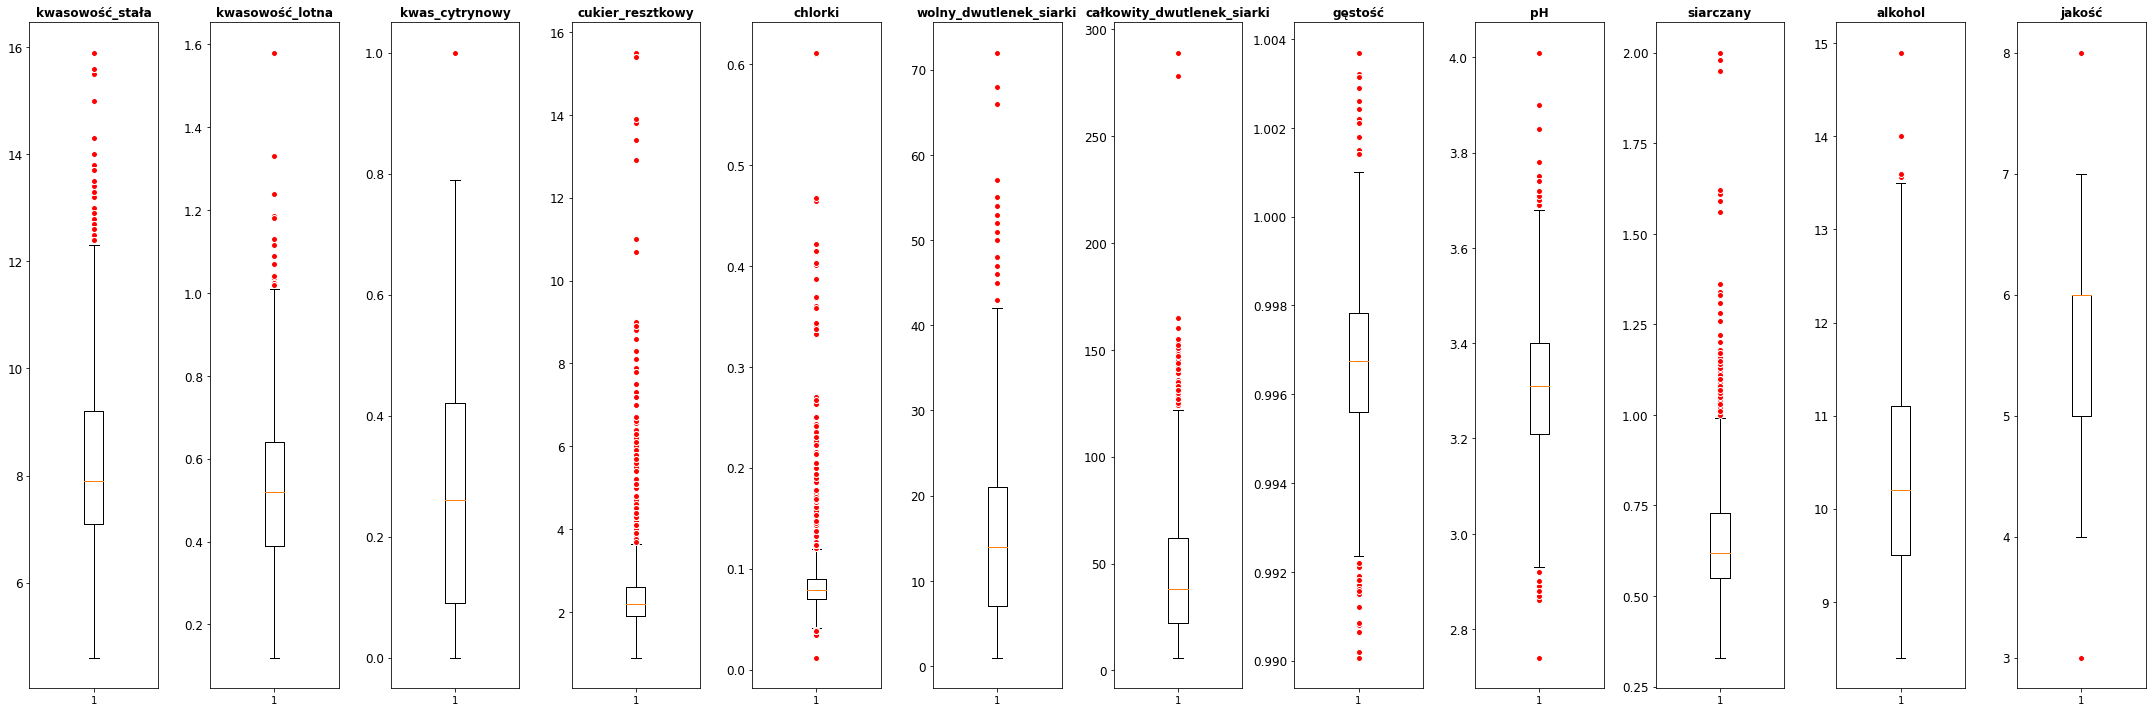

In [46]:
#box plot dla kazdej kolumny 
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

In [47]:
import plotly.express as px

In [63]:
for i in df.columns:
    nbins = 80
    fig = px.histogram(df, x=i,
                    marginal="box",
                    width=800, height=500,
                    title=i,
                    color_discrete_sequence=['#FF6692'],
                    nbins = nbins)


    fig.update_layout(
        font_family="Ubuntu",
        font_color="black",
        title_font_family="Ubuntu",
        title_font_color="black",
        title_font_size=25,
        yaxis_title_text="Ilość",
        xaxis_title_text=i
    )

    fig.show()